In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [42]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (18, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [111]:
dfp = pd.read_csv("Population Estimates by State.csv")
def get_pop(state):
    global dpf
    state_map = {'CA': 'California', 'TX': 'Texas', 'OH': 'Ohio', 'WI': 'Wisconsin', 'AZ': 'Arizona',
                 'CO': 'Colorado', 'MI': 'Michigan', 'FL': 'Florida', 'SD': 'South Dakota', 'WY': 'Wyoming',
                 'PA': 'Pennsylvania'}
    if state in state_map:
        return dfp[dfp.States == state_map[state]].iloc[0].Population
    else:
        return 0

In [112]:
#df = pd.read_csv('/Users/dane/odd/data/usafacts.org_covid_data/covid_confirmed_usafacts.csv')
df = pd.read_csv('http://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv')
df.to_csv('/Users/dane/odd/data/usafacts.org_covid_data/covid_confirmed_usafacts.csv')
df.head(1)

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cases = []
def get_county_data(row):
    global cases
    county = row['County Name'].replace(' County','')
    state = row.State
    ident = county + ', ' + state
    
    cases = row[4:]
    cdf = pd.DataFrame({'cases': cases, 'cpd': cases.diff()}).dropna()
    cdf.index.name = ident
    cdf['day'] = pd.to_datetime(cdf.index, format='%m/%d/%y')
    cdf['week'] = cdf.day.apply(lambda x: int(x.strftime('%U')))
    return cdf

def get_state_data(df):
    global cases
    cases = df.sum()[4:]
    cdf = pd.DataFrame({'cases': cases, 'cpd': cases.diff()}).dropna()
    cdf['day'] = pd.to_datetime(cdf.index, format='%m/%d/%y')
    cdf['week'] = cdf.day.apply(lambda x: int(x.strftime('%U')))
    return cdf

In [45]:
def get_county(df, county, state):
    mask1 = df['County Name'] == county
    mask2 = df['State'] == state
    rows = df[mask1 & mask2]
    
    if len(rows) == 1:
        return get_county_data(rows.iloc[0])
    elif len(rows) == 0:
        return 'No matches'
    else:
        
        return [x.State for k, x in rows.iterrows()]

def get_state(df, state):
    mask2 = df['State'] == state
    rows = df[mask2]
    return get_state_data(rows)

In [46]:
cdf = get_county(df, 'Santa Cruz County', 'CA')
cdf

,cases,cpd,day,week
"Santa Cruz, CA",,,,
1/23/20,0,0,2020-01-23,3
1/24/20,0,0,2020-01-24,3
1/25/20,0,0,2020-01-25,3
1/26/20,0,0,2020-01-26,4
1/27/20,0,0,2020-01-27,4
...,...,...,...,...
11/8/20,3074,0,2020-11-08,45
11/9/20,3221,147,2020-11-09,45
11/10/20,3227,6,2020-11-10,45


In [106]:
def plot_cpd(d):
    fig = plt.gcf()
    fig.set_size_inches(18,10)
    weekly = d.groupby('week').cpd.sum()
    #ax = weekly.plot(kind='bar')
    ax = weekly[:-1].plot(kind='bar')  # skip last partial week
    plt.title(d.index.name, fontsize=20)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.text(0,100,'39=October 5', fontsize=15)
    plt.plot()
    m1 = weekly.iloc[-3]  # -3 because current week is partial
    m2 = weekly.iloc[-2]
    gain = 100 * ((m2 / m1) - 1)
    print(f'Last Week {m1} -> {m2} ({gain:.1f}%)')
    print(f'Population: {get_pop(d.index.name)}')

Last Week 96 -> 190 (97.9%)
Population: 0


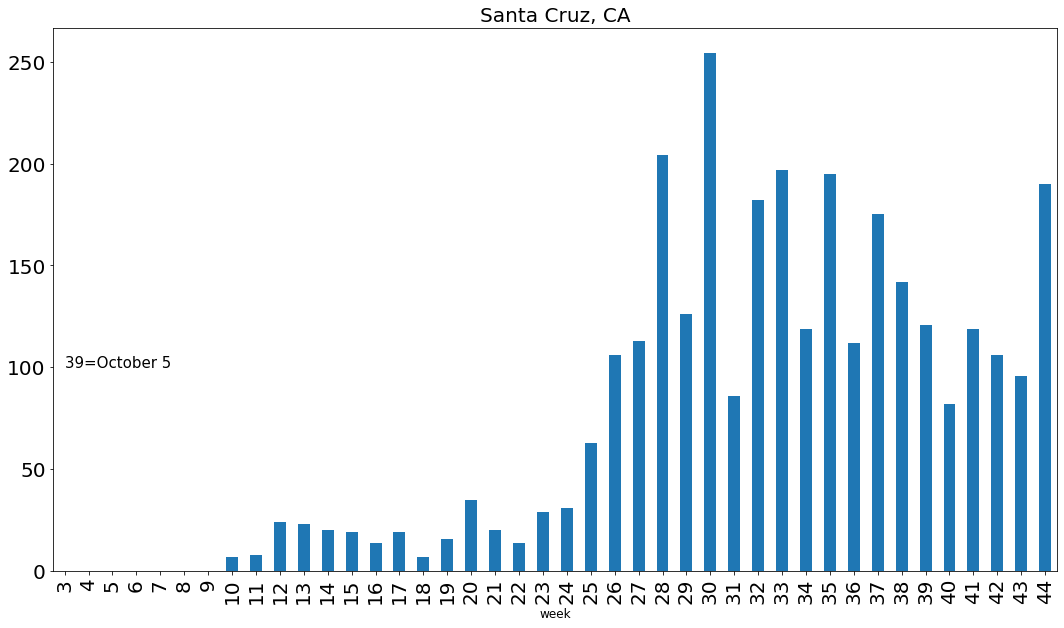

In [107]:
plot_cpd(cdf)

Last Week 972 -> 1151 (18.4%)


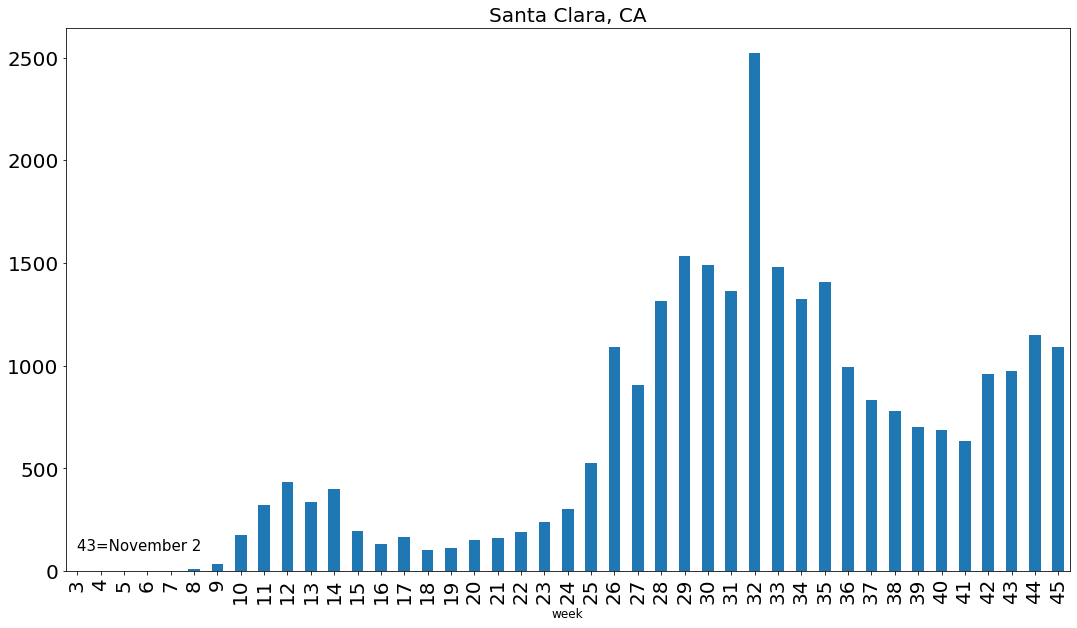

In [73]:
scdf = get_county(df, 'Santa Clara County', 'CA')
plot_cpd(scdf)

Last Week 8681 -> 12359 (42.4%)


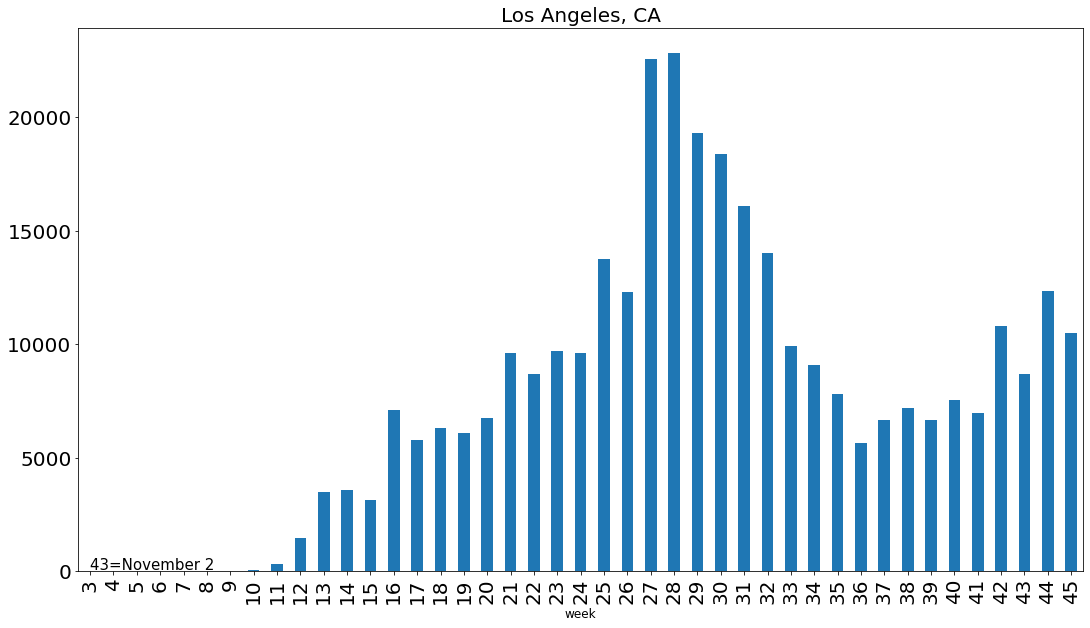

In [74]:
scdf = get_county(df, 'Los Angeles County', 'CA')
plot_cpd(scdf)

Last Week 2436 -> 2906 (19.3%)


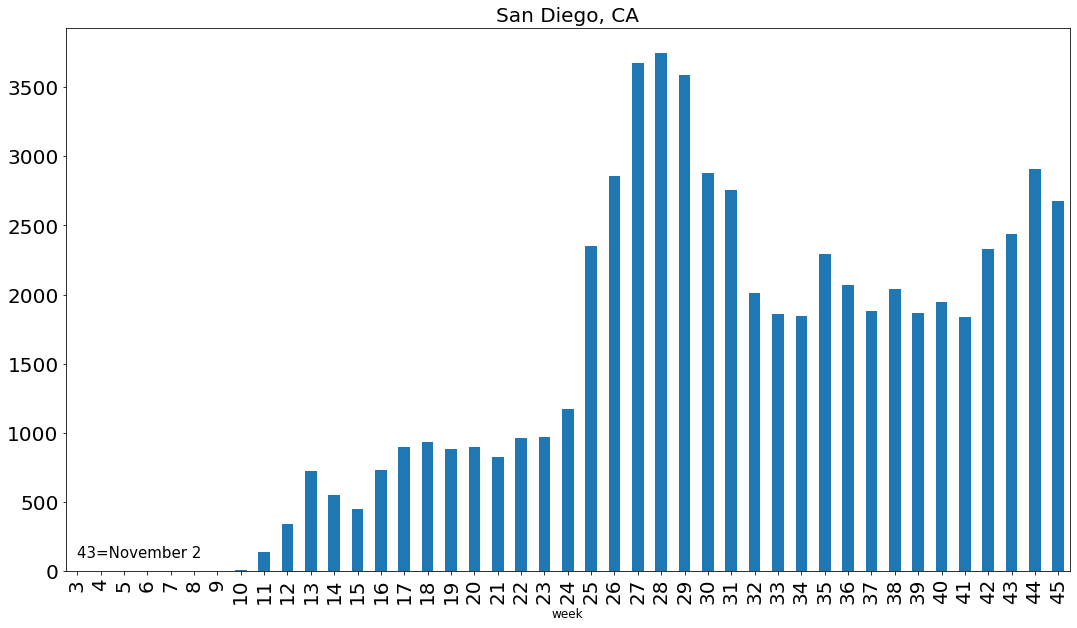

In [75]:
scdf = get_county(df, 'San Diego County', 'CA')
plot_cpd(scdf)

Last Week 725 -> 1162 (60.3%)


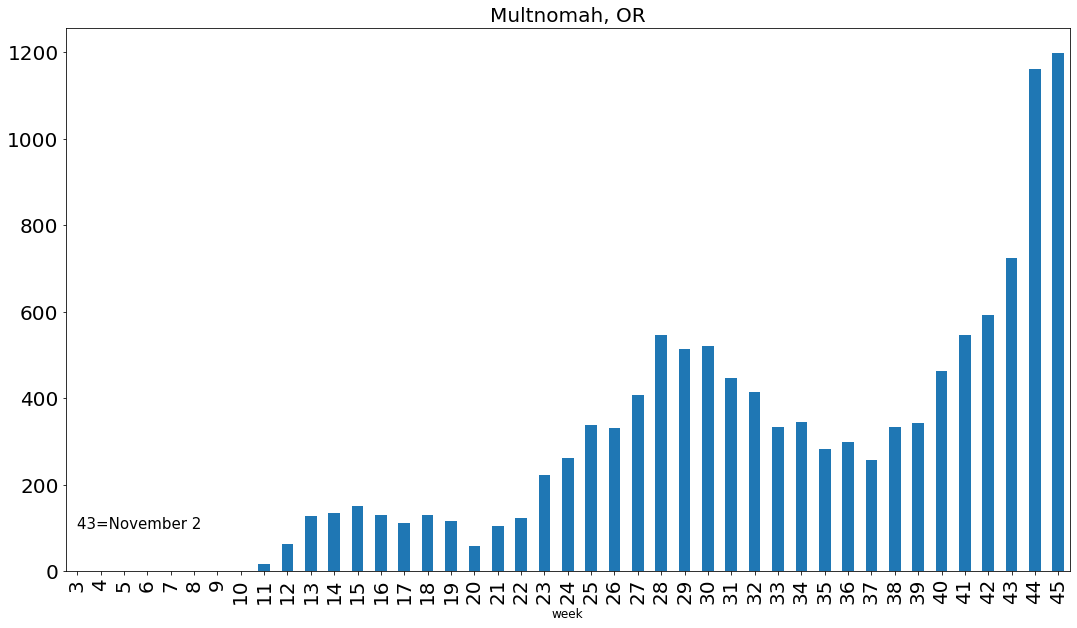

In [76]:
scdf = get_county(df, 'Multnomah County', 'OR')
plot_cpd(scdf)

Last Week 9174 -> 11438 (24.7%)
Population: 7,278,717


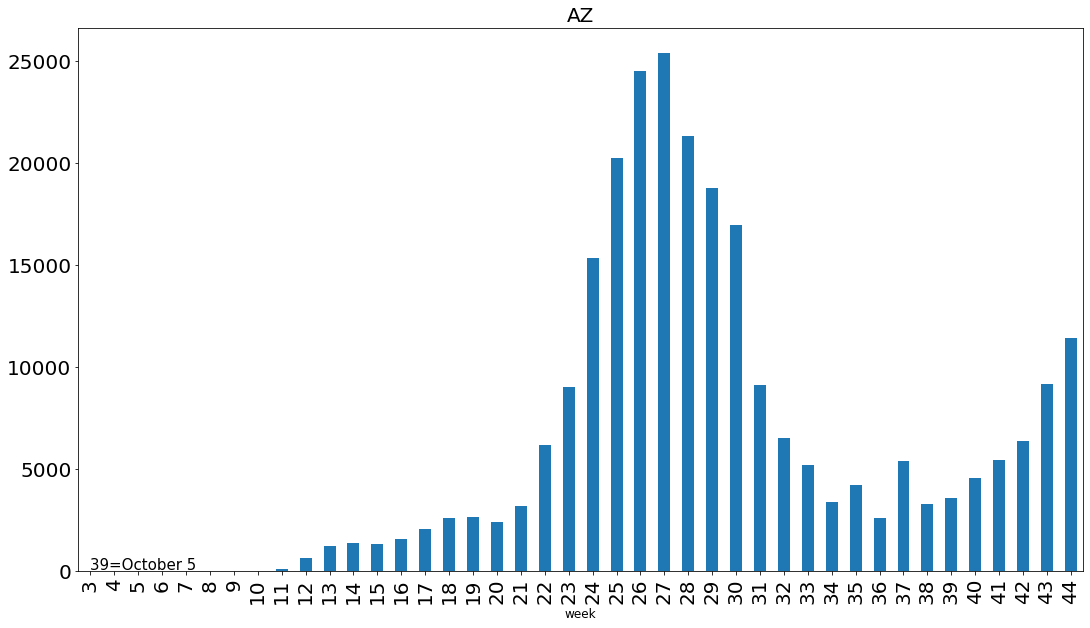

In [109]:
cadf = get_state(df, 'AZ')
cadf.index.name = 'AZ'
plot_cpd(cadf)

Last Week 28141 -> 37297 (32.5%)
39,512,223


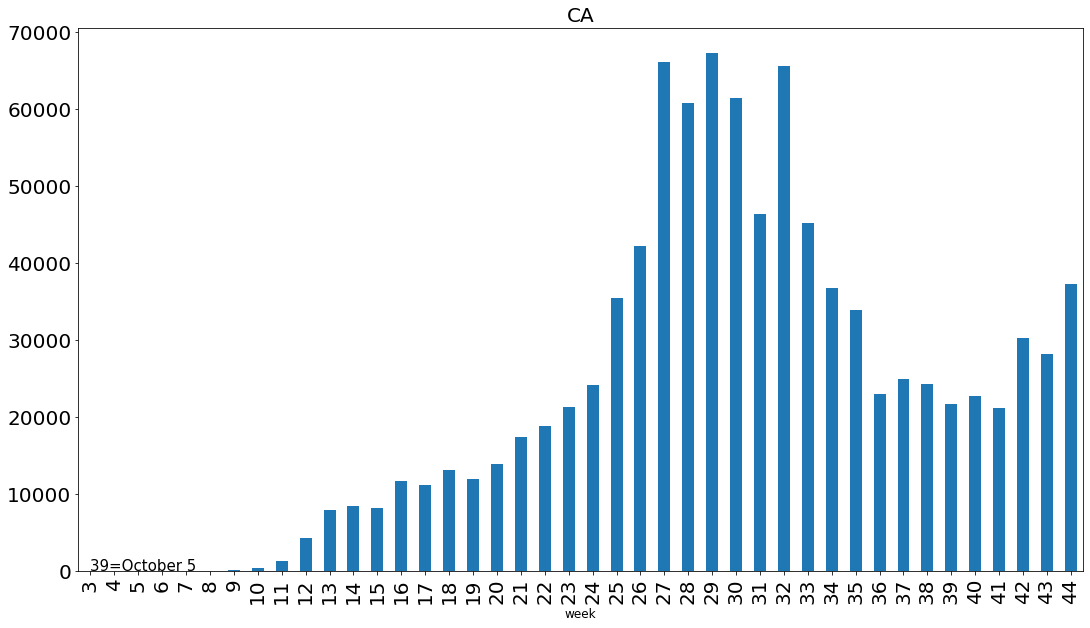

In [105]:
cadf = get_state(df, 'CA')
cadf.index.name = 'CA'
plot_cpd(cadf)

Last Week 11033 -> 23541 (113.4%)
Population: 5,758,736


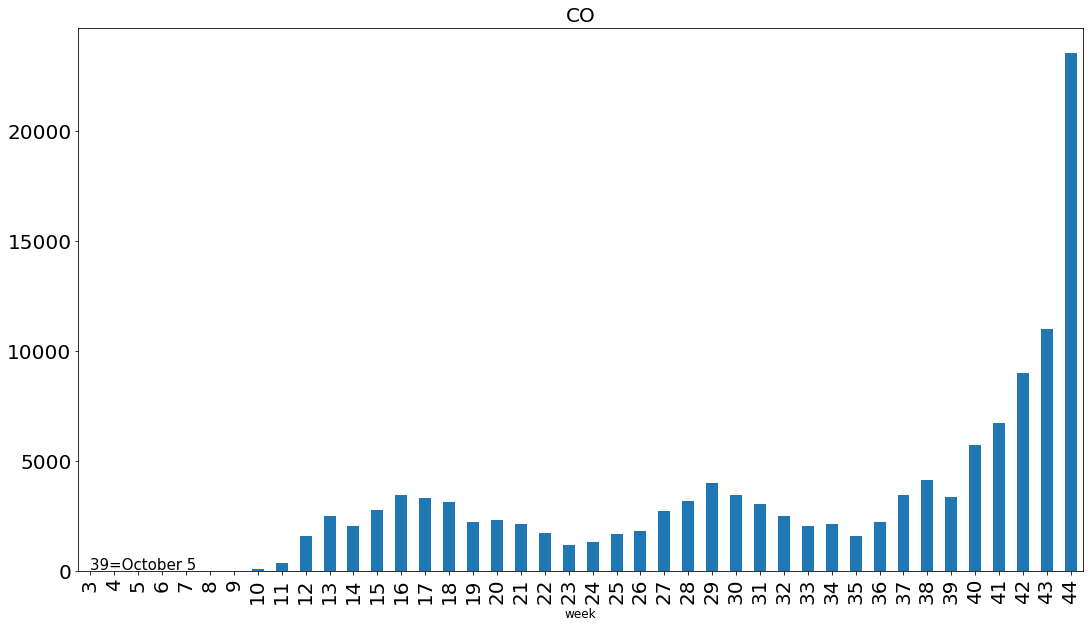

In [110]:
cadf = get_state(df, 'CO')
cadf.index.name = 'CO'
plot_cpd(cadf)

Last Week 26294 -> 34532 (31.3%)


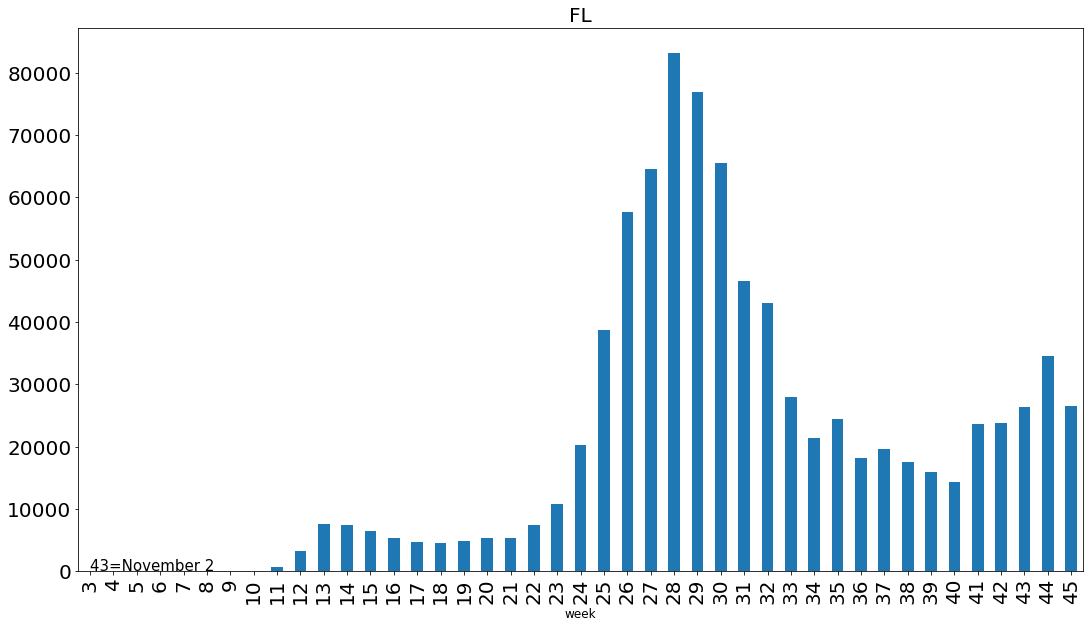

In [78]:
cadf = get_state(df, 'FL')
cadf.index.name = 'FL'
plot_cpd(cadf)

Last Week 11163 -> 11078 (-0.8%)


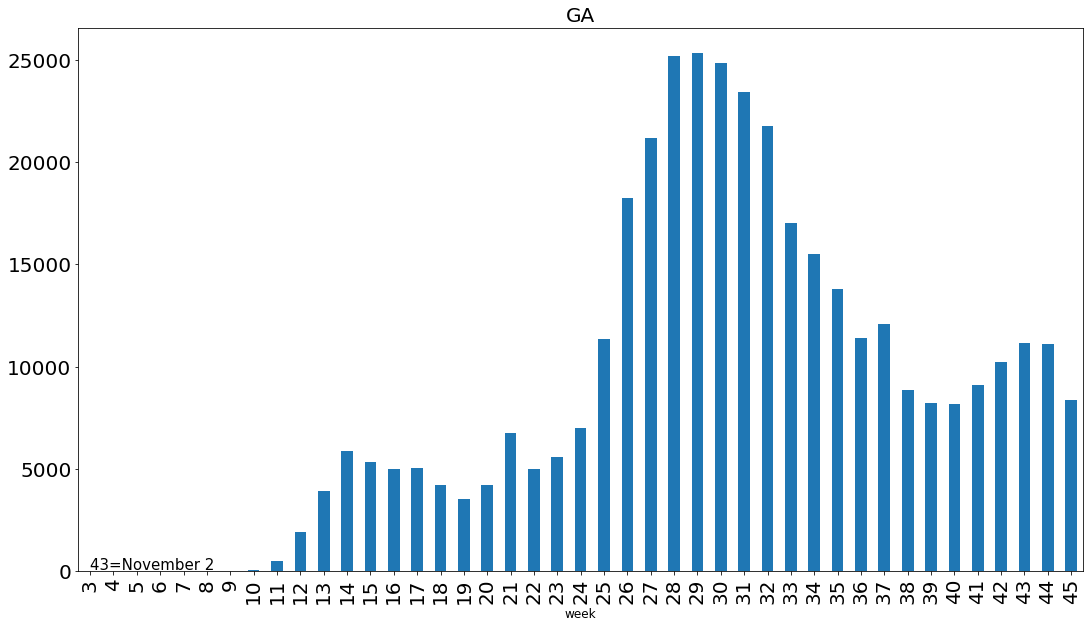

In [89]:
cadf = get_state(df, 'GA')
cadf.index.name = 'GA'
plot_cpd(cadf)

Last Week 18949 -> 26407 (39.4%)


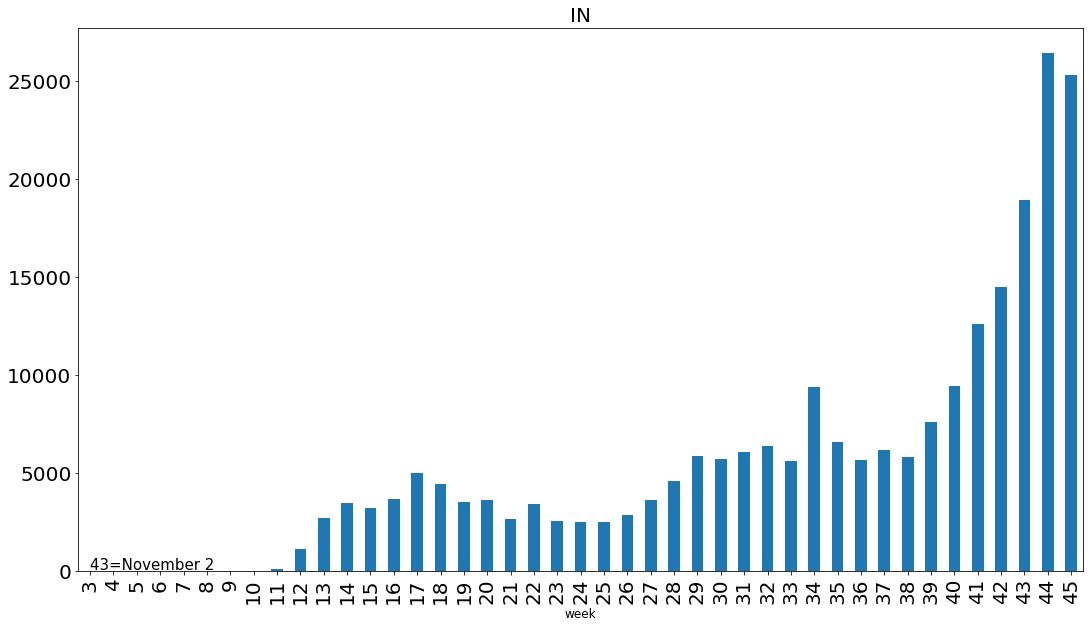

In [92]:
cadf = get_state(df, 'IN')
cadf.index.name = 'IN'
plot_cpd(cadf)

Last Week 32209 -> 75577 (134.6%)


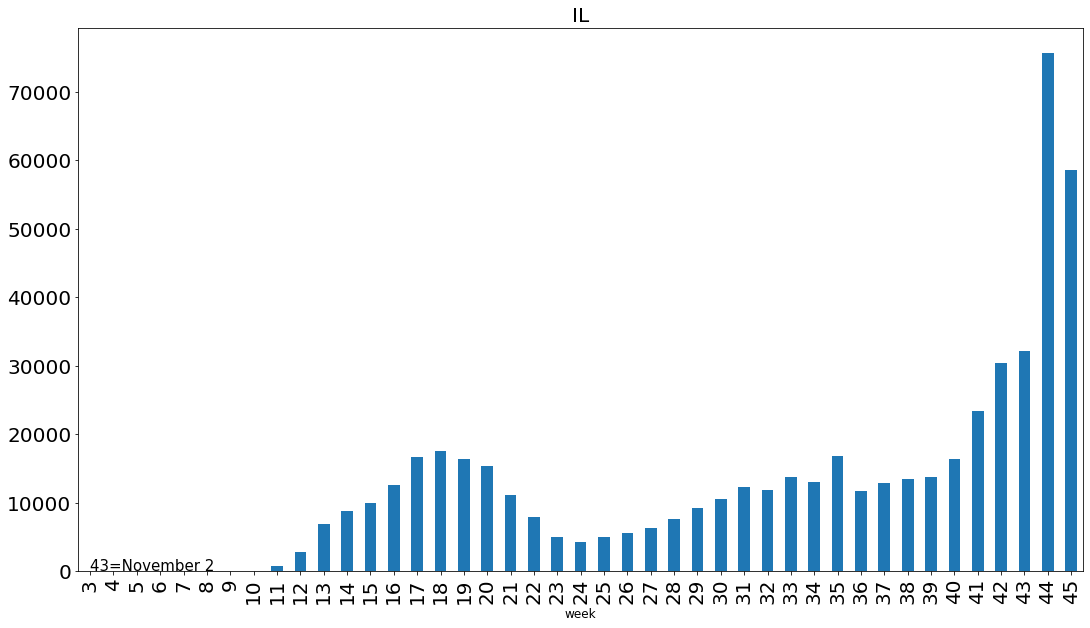

In [83]:
cadf = get_state(df, 'IL')
cadf.index.name = 'IL'
plot_cpd(cadf)

Last Week 11735 -> 12328 (5.1%)


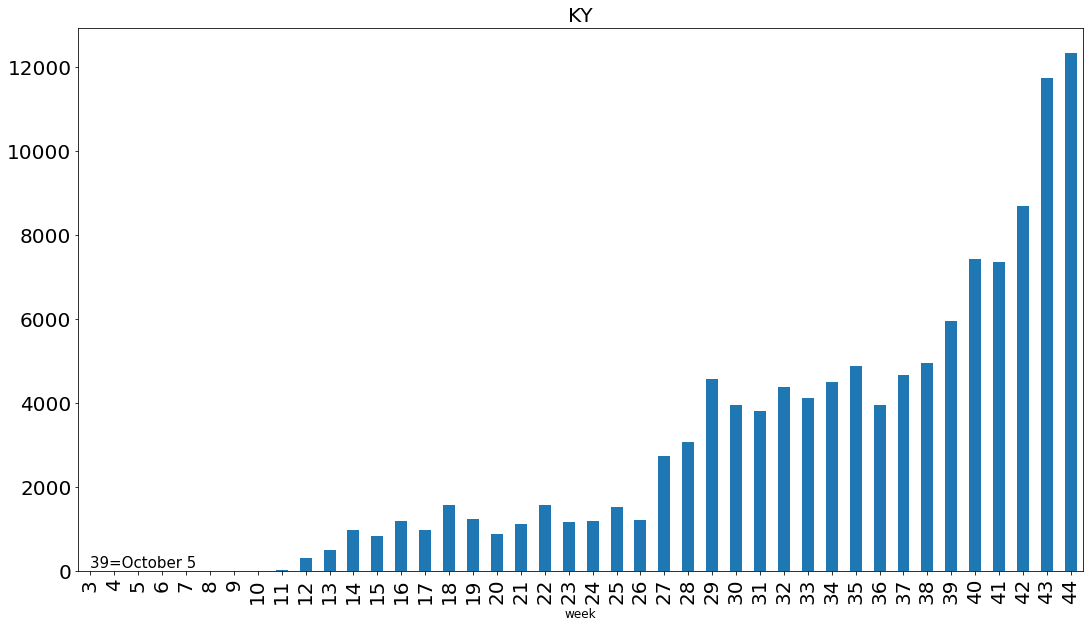

In [98]:
cadf = get_state(df, 'KY')
cadf.index.name = 'KY'
plot_cpd(cadf)

Last Week 21795 -> 25103 (15.2%)


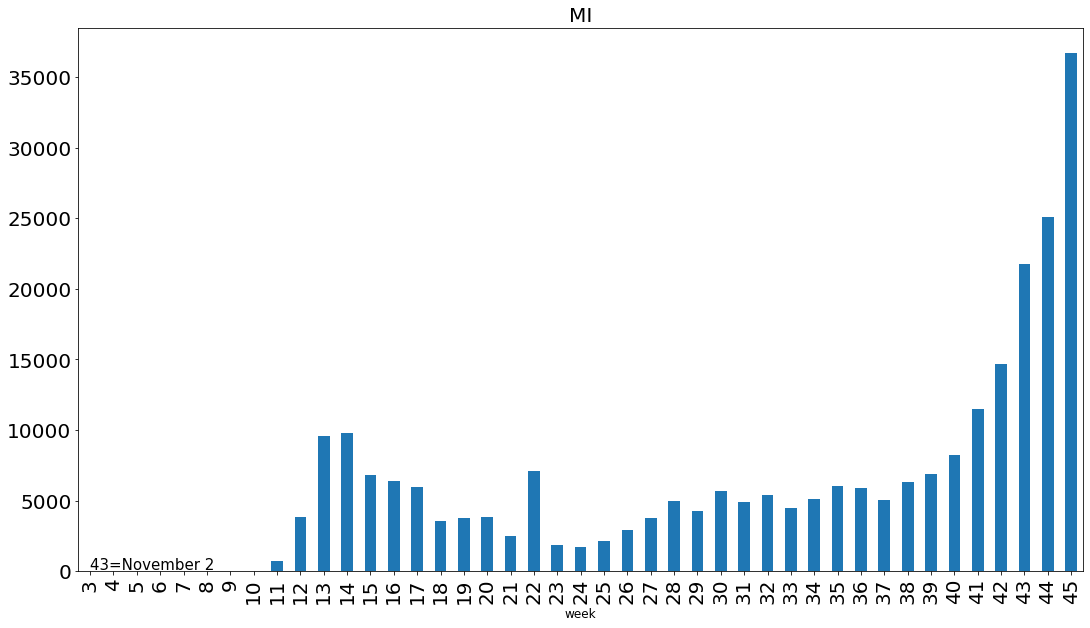

In [93]:
cadf = get_state(df, 'MI')
cadf.index.name = 'MI'
plot_cpd(cadf)

Last Week 18550 -> 24282 (30.9%)


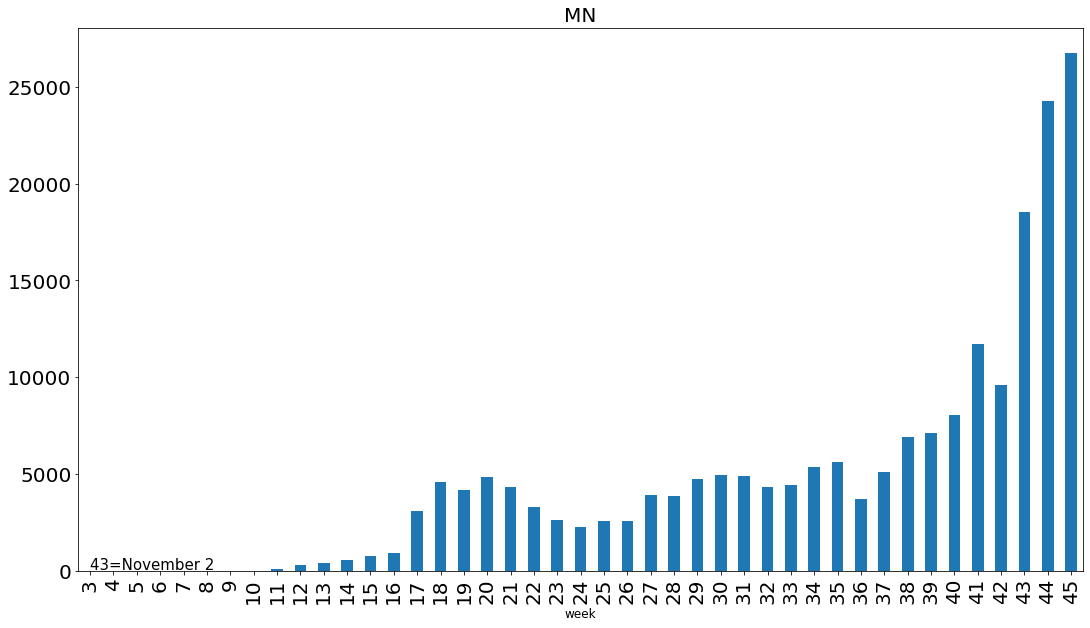

In [82]:
cadf = get_state(df, 'MN')
cadf.index.name = 'MN'
plot_cpd(cadf)

Last Week 13711 -> 18065 (31.8%)


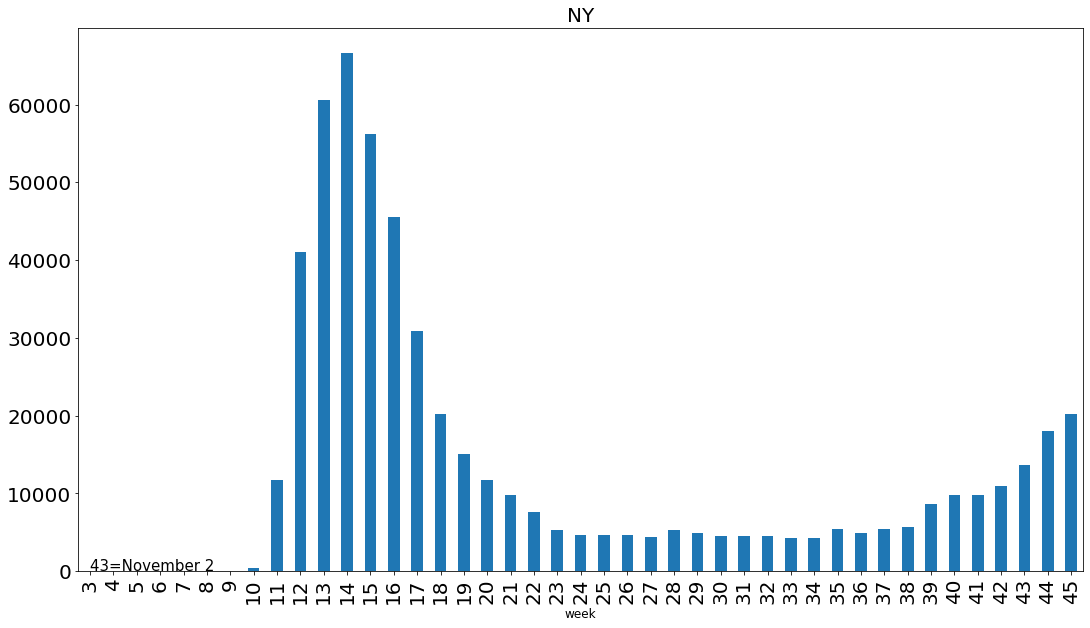

In [94]:
cadf = get_state(df, 'NY')
cadf.index.name = 'NY'
plot_cpd(cadf)

Last Week 19891 -> 30030 (51.0%)


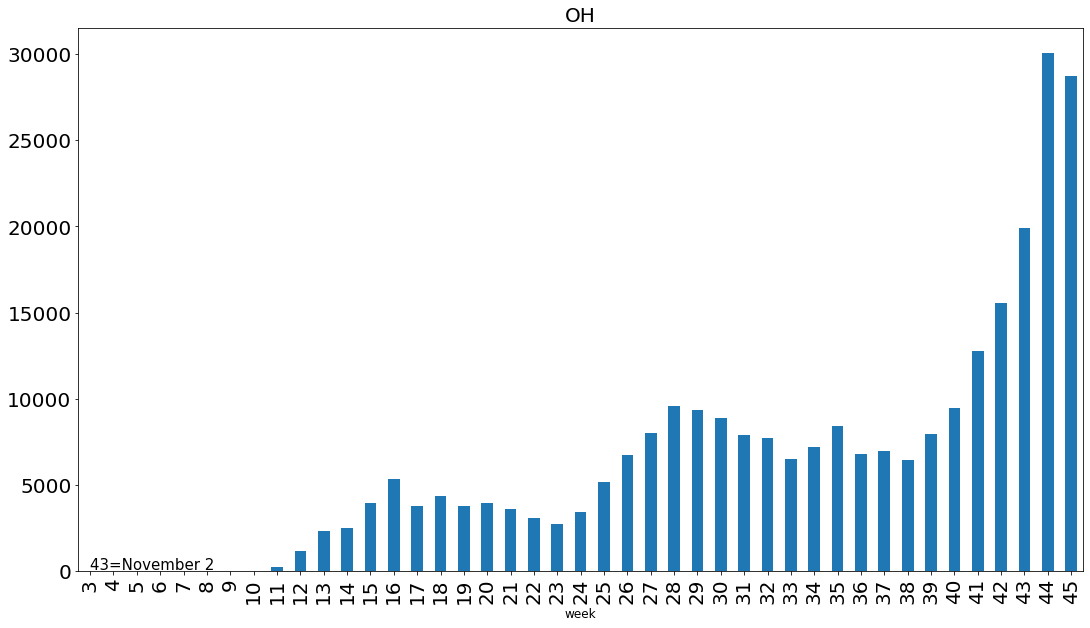

In [95]:
cadf = get_state(df, 'OH')
cadf.index.name = 'OH'
plot_cpd(cadf)

Last Week 15405 -> 19958 (29.6%)
Population: 0


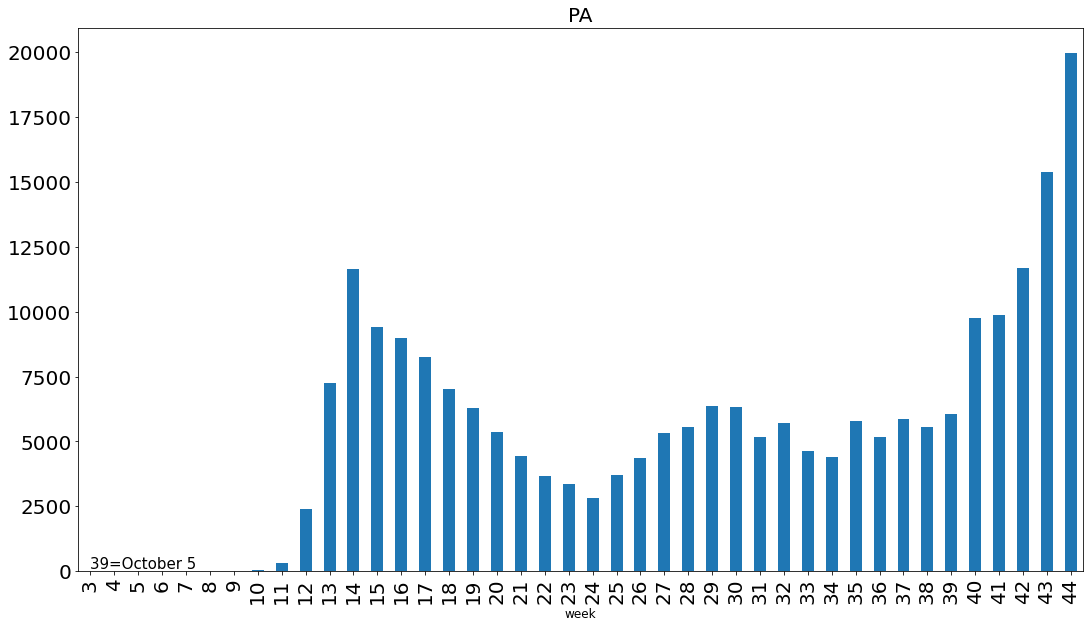

In [114]:
cadf = get_state(df, 'PA')
cadf.index.name = 'PA'
plot_cpd(cadf)

Last Week 7851 -> 7981 (1.7%)


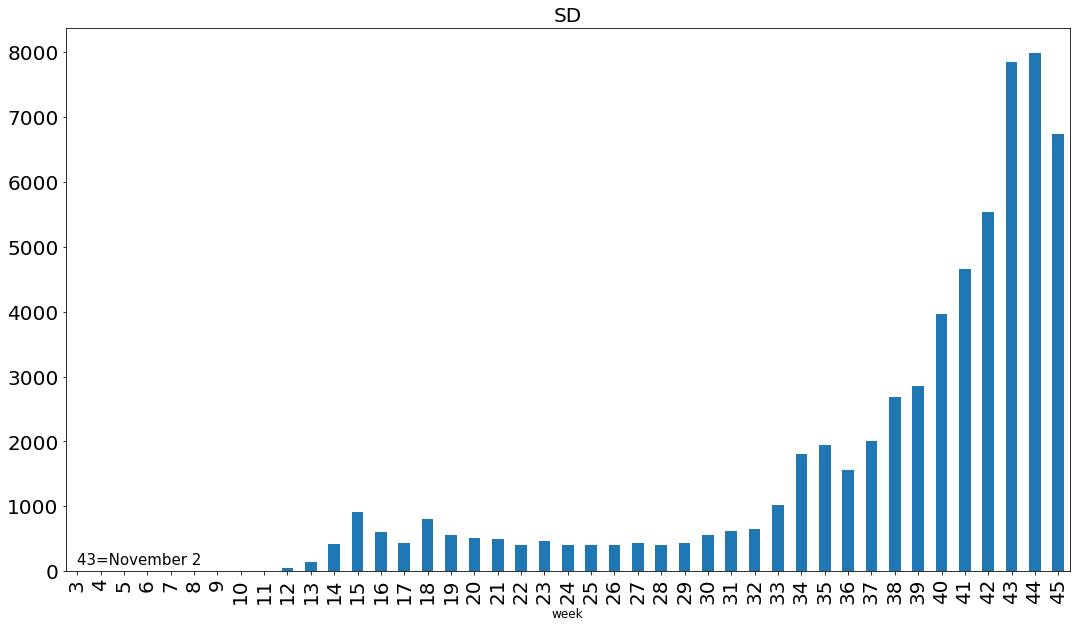

In [80]:
cadf = get_state(df, 'SD')
cadf.index.name = 'SD'
plot_cpd(cadf)

Last Week 43106 -> 50327 (16.8%)
Population: 28,995,881


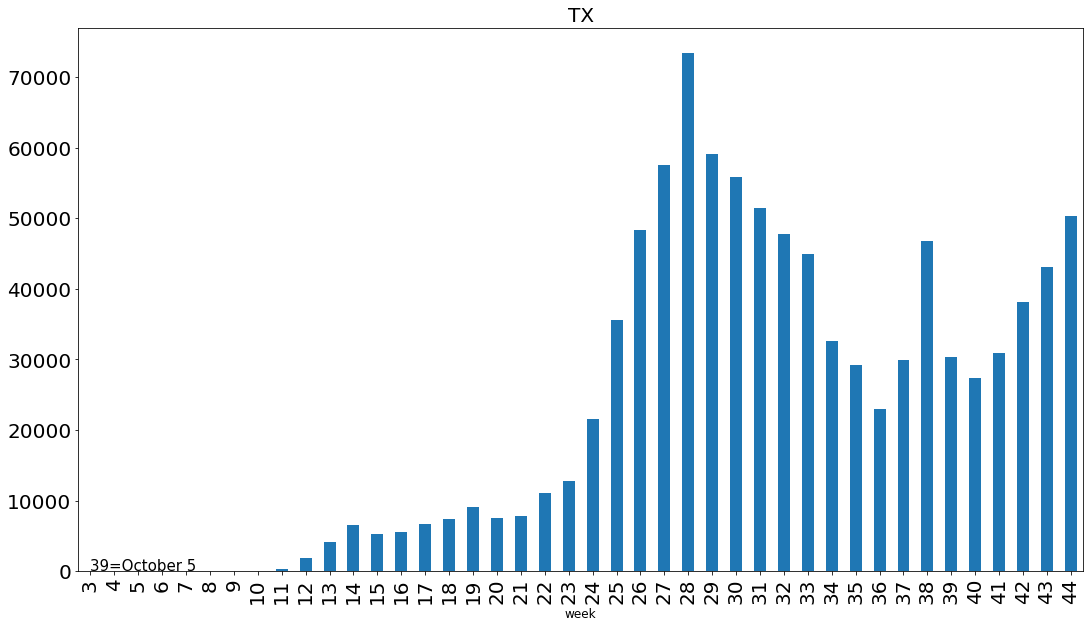

In [115]:
cadf = get_state(df, 'TX')
cadf.index.name = 'TX'
plot_cpd(cadf)

Last Week 32731 -> 39633 (21.1%)


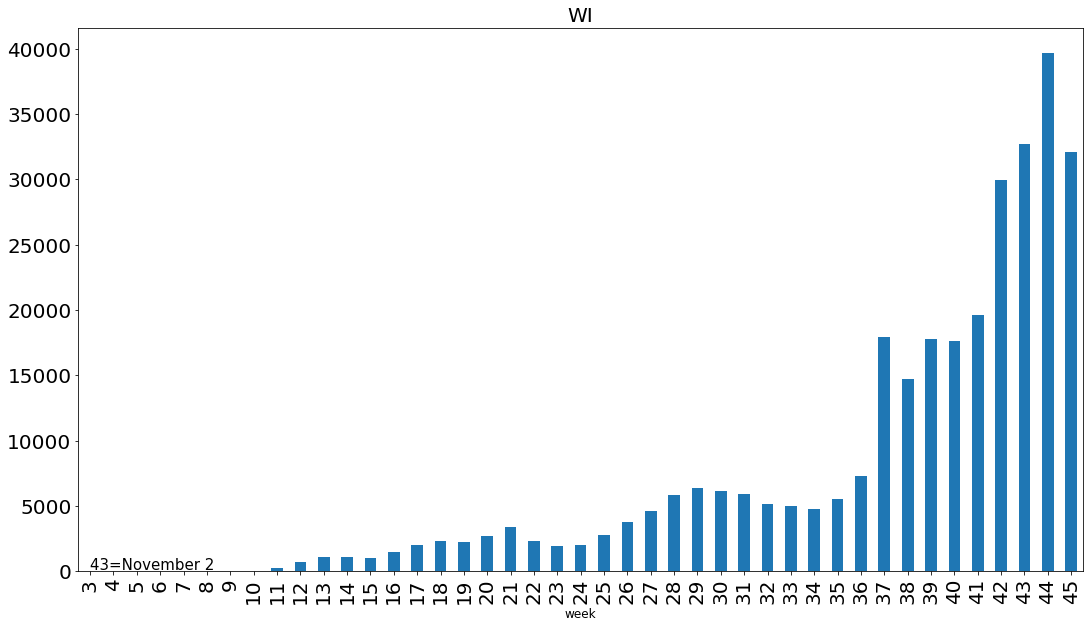

In [87]:
cadf = get_state(df, 'WI')
cadf.index.name = 'WI'
plot_cpd(cadf)

Last Week 1303 -> 4788 (267.5%)
Population: 578,759


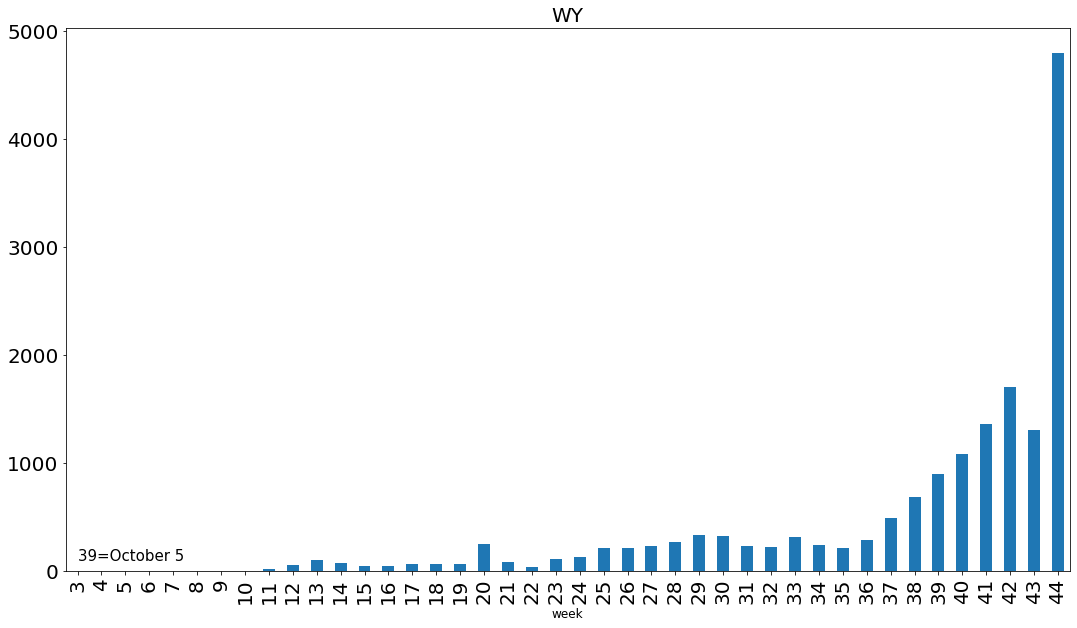

In [113]:
cadf = get_state(df, 'WY')
cadf.index.name = 'WY'
plot_cpd(cadf)